In [871]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [872]:
df = pd.read_excel('foil.xlsx')

In [873]:
x = df['x']
y = df['y']

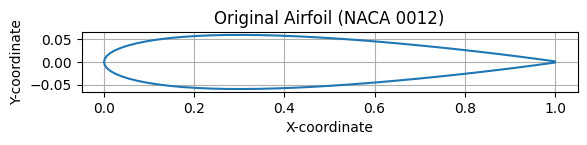

In [874]:
plt.plot(x,y)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Original Airfoil (NACA 0012)')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid()

In [875]:
x = df['x'].values
y = df['y'].values

In [876]:
from numpy import nan

In [877]:
x = x[np.logical_not(np.isnan(x))]
y = y[np.logical_not(np.isnan(y))]

In [878]:
def hicks_henne(x_coord, y_coord , n, a, w, xM):
    y_deformed = np.array(y_coord)
    for i in range(n):
        ai = a[i]
        xMi = xM[i]
        wi = w[i]
        m = np.log(0.5)/np.log(xMi)
        y_deformed += ai * np.sin(np.pi * np.array(x_coord) ** m )**wi

    return y_deformed   

In [879]:
#inputs
n = 15
a_up =  [0.003, 0.03, 0.02, -0.04, 0.03, -0.02, 0.01, -0.005, 0.003, -0.002, 0.001, 0.001, 0.001, 0.001, 0.001]
a_low = [0.001, -0.03, 0.03, -0.04, 0.03, -0.02, 0.01, -0.005, 0.003, -0.002, 0.001, 0.001, 0.001, 0.001, 0.001]
w = np.full(15,2)  

In [880]:
xM = np.array([])
for i in range(1,n+1):
    x_m =  0.5 * (1 - math.sin(math.pi * i / n))
    xM = np.append(xM,x_m)

In [881]:
xM

array([0.39604415, 0.29663168, 0.20610737, 0.12842759, 0.0669873 ,
       0.02447174, 0.00273905, 0.00273905, 0.02447174, 0.0669873 ,
       0.12842759, 0.20610737, 0.29663168, 0.39604415, 0.5       ])

In [882]:
def split_list(arr):
    half = len(arr)//2
    return arr[:half+1], arr[half+1:]

x_up, x_low = split_list(x)
y_up, y_low = split_list(y)

In [883]:
y_mod_up = hicks_henne(x_up, y_up, n, a_up, w, xM)
y_mod_low = hicks_henne(x_low, y_low, n, a_low, w, xM)
y_mod = np.concatenate((y_mod_up, y_mod_low))

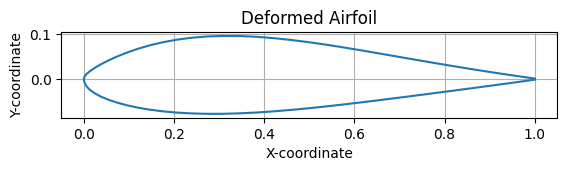

In [884]:
plt.plot(x,y_mod)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Deformed Airfoil')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid()

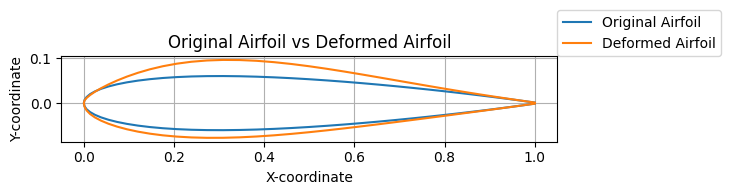

In [885]:
plt.plot(x, y, label = "Original Airfoil")
plt.plot(x, y_mod, label = "Deformed Airfoil")
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Original Airfoil vs Deformed Airfoil')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend(loc=(1,1))
plt.grid()

In [886]:
df1 = pd.DataFrame({'x': x, 'y_modified': y_mod} )

In [887]:
df1.head()

,x,y_modified
0,1.000000,0.001260
1,0.998459,0.001476
2,0.993844,0.002125
3,0.986185,0.003209
4,0.975528,0.004727


In [888]:
path = "C:/Users/user/OneDrive - BUET/Desktop/Deform/Hicks-Henne deformation of 2d airfoil/Deformed_airfoil.xlsx" 
with pd.ExcelWriter(path, mode = "a", engine = "openpyxl", if_sheet_exists = "replace") as writer:
    df1.to_excel(writer, index = False)